# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [3]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=10_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_0 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_baseline'
perusresults='results/malli_baseline'

perustulomalli='best/perustulomalli'
perustuloresults='results/perustulo_results9'

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [4]:
if False: # no baseline here
    cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=False)
    cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,
                    save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/perus_results9',
                    callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)
else:
    cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=False)
    cc1.load_sim(load=perusresults)
    #cc1.render()

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



## Perustulo

Alustava versio perustulosta, joka ei mallinna koko perustuloa vielä. Tulee muuttumaan, kun mukana koko mallli.

In [5]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,
                   save=perustulomalli,plot=False,
                   results=perustuloresults,start_from=perustulomalli,cont=True,
                   callback_minsteps=callback_minsteps,twostage=twostage)
cc1_pt.render(load=perustuloresults)


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo True
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 1758     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | 0.0114   |
| total_timesteps    | 2424     |
| value_loss         | 0.0136   |
---------------------------------


-------

---------------------------------
| explained_variance | 0.996    |
| fps                | 2525     |
| nupdates           | 60       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0196  |
| total_timesteps    | 145440   |
| value_loss         | 0.0486   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2514     |
| nupdates           | 70       |
| policy_entropy     | 1.08     |
| policy_loss        | 0.00737  |
| total_timesteps    | 169680   |
| value_loss         | 0.0467   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2508     |
| nupdates           | 80       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0215  |
| total_timesteps    | 193920   |
| value_loss         | 0.0199   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

KeyboardInterrupt: 

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



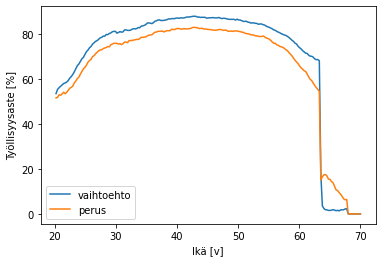

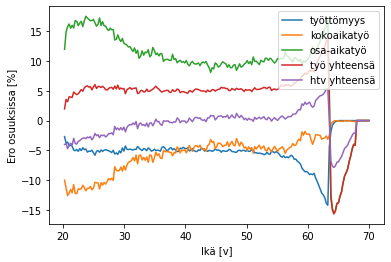

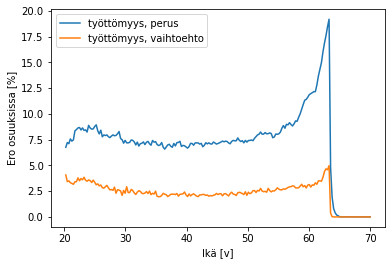

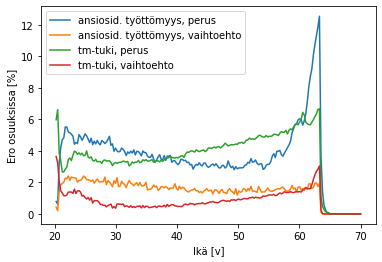

Työllisyysvaikutus 21-63-vuotiaisiin noin -3485 htv ja 167601 työllistä
Työllisyysastevaikutus 21-63-vuotiailla noin 5.67 prosenttia (80.73 vs 75.07)
epävarmuus työllisyysasteissa 0.0196, hajonta 0.0772


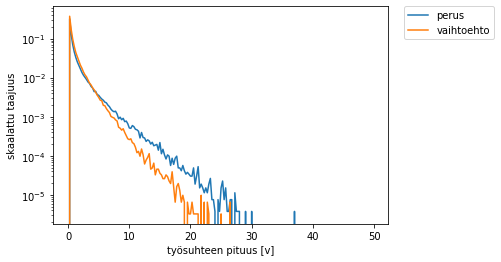

Jakauma ansiosidonnainen+tmtuki+putki, no max age
vaihtoehto keskikesto 0.6941403801963651 v perus Keskikesto 0.3322827691339802 v
Skaalaamaton vaihtoehto lkm 47870 v perus lkm 41327 v
Skaalaamaton vaihtoehto työtpäiviä yht 33228.5 v perus työtpäiviä yht 13732.25 v


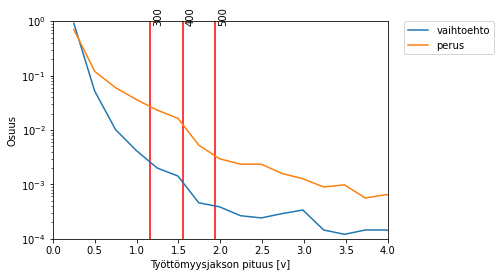

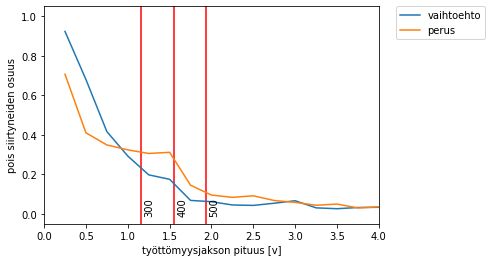

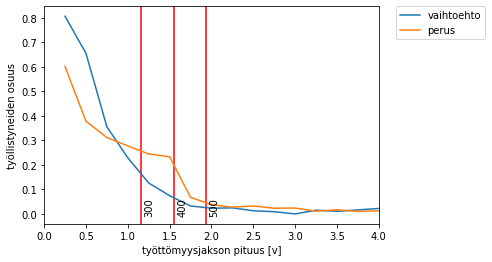

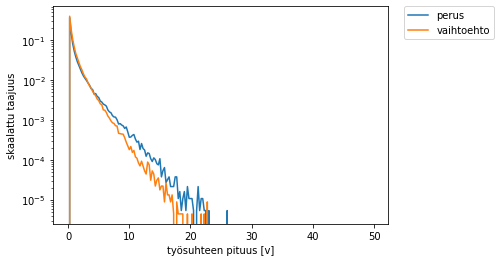

Jakauma ansiosidonnainen+tmtuki+putki, max age 54
vaihtoehto keskikesto 0.44660135462022255 v perus Keskikesto 0.28156636670416196 v
Skaalaamaton vaihtoehto lkm 41340 v perus lkm 35560 v
Skaalaamaton vaihtoehto työtpäiviä yht 18462.5 v perus työtpäiviä yht 10012.5 v


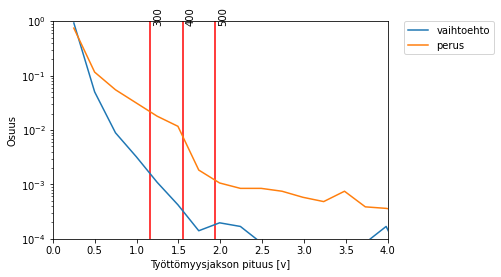

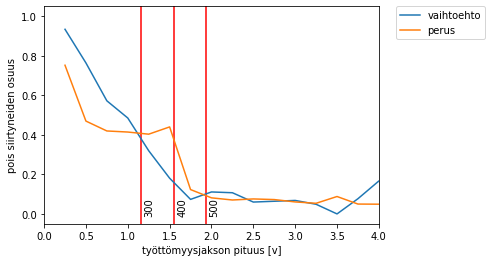

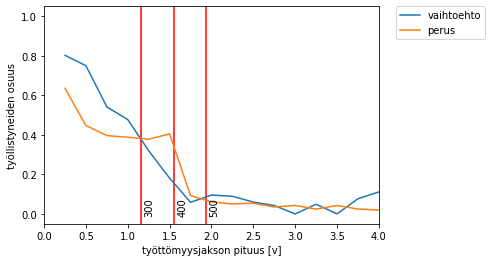

In [6]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc1_pt.load_sim(load=perustuloresults)
cc1_pt.compare_with(cc1)